In [63]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from keras.callbacks import EarlyStopping
import numpy as np
from sklearn import preprocessing
from sklearn import linear_model
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn import neighbors, metrics
import pandas as pd

In [7]:
df = pd.read_csv('bank.csv')

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [10]:
df.shape

(11162, 17)

In [11]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [12]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [13]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

<AxesSubplot:xlabel='education', ylabel='balance'>

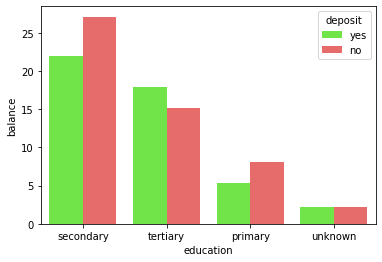

In [14]:
palette = ["#64FE2E", "#FA5858"]
sns.barplot(x="education", y="balance", hue="deposit", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)

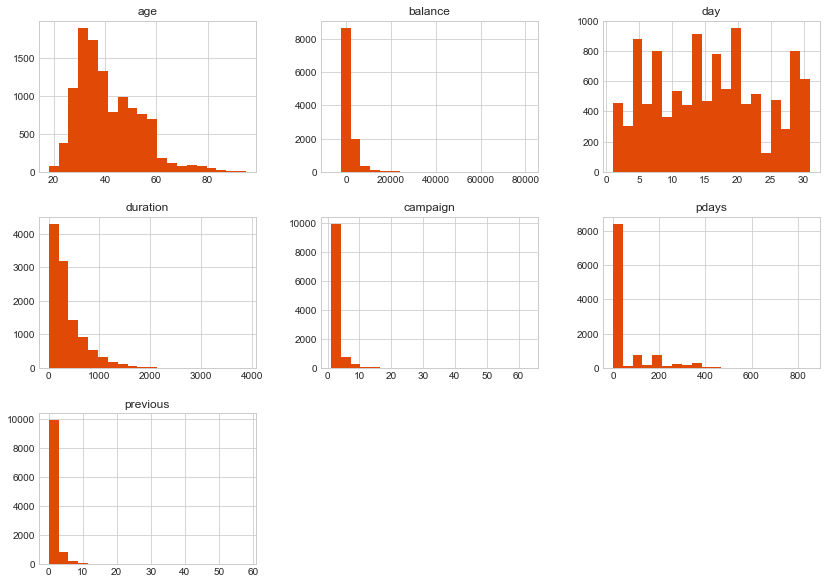

In [15]:
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

In [57]:
from sklearn.preprocessing import OrdinalEncoder
df["newdep"] = np.where(df["deposit"].str.contains("yes"), 1, 0)
df["ndefault"] = np.where(df["default"].str.contains("yes"), 1, 0)
df["nhousing"] = np.where(df["housing"].str.contains("yes"), 1, 0)
df["nloan"] = np.where(df["loan"].str.contains("yes"), 1, 0)
ord_enc = OrdinalEncoder()
df["njob"] = ord_enc.fit_transform(df[["job"]])
df["neducation"] = ord_enc.fit_transform(df[["education"]])
df["nmarital"] = ord_enc.fit_transform(df[["marital"]])
df["ncontact"] = ord_enc.fit_transform(df[["contact"]])
df["npoutcome"] = ord_enc.fit_transform(df[["poutcome"]])
df["nmonth"] = ord_enc.fit_transform(df[["month"]])
dfn =df.drop(["deposit", "default","housing","loan","job","education","marital","contact","poutcome","month"], axis=1)
dfn




,age,balance,day,duration,campaign,pdays,previous,newdep,ndefault,nhousing,nloan,njob,neducation,nmarital,ncontact,npoutcome,nmonth
0,59,2343,5,1042,1,-1,0,1,0,1,0,0.0,1.0,1.0,2.0,3.0,8.0
1,56,45,5,1467,1,-1,0,1,0,0,0,0.0,1.0,1.0,2.0,3.0,8.0
2,41,1270,5,1389,1,-1,0,1,0,1,0,9.0,1.0,1.0,2.0,3.0,8.0
3,55,2476,5,579,1,-1,0,1,0,1,0,7.0,1.0,1.0,2.0,3.0,8.0
4,54,184,5,673,2,-1,0,1,0,0,0,0.0,2.0,1.0,2.0,3.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,0,0,1,0,1.0,0.0,2.0,0.0,3.0,0.0
11158,39,733,16,83,4,-1,0,0,0,0,0,7.0,1.0,1.0,2.0,3.0,6.0
11159,32,29,19,156,2,-1,0,0,0,0,0,9.0,1.0,2.0,0.0,3.0,1.0
11160,43,0,8,9,2,172,5,0,0,0,1,9.0,1.0,1.0,0.0,0.0,8.0


In [58]:
train_size=0.8

X = dfn.drop(columns = ['newdep']).copy()
y = dfn['newdep']


X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(8929, 16)
(8929,)
(1116, 16)
(1116,)
(1117, 16)
(1117,)


(None, None)

In [41]:
X_train


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,ndefault,nhousing,nloan
2768,50,management,married,tertiary,no,469,no,no,cellular,16,oct,170,1,183,1,success,yes,0,0,0
1018,43,technician,married,tertiary,no,4333,yes,no,cellular,20,nov,1490,3,-1,0,unknown,yes,0,1,0
658,36,management,divorced,tertiary,no,0,no,no,cellular,4,aug,1165,1,-1,0,unknown,yes,0,0,0
3167,22,student,single,secondary,no,216,no,no,cellular,8,feb,363,1,187,1,success,yes,0,0,0
396,56,blue-collar,single,secondary,no,663,no,yes,cellular,8,jul,819,3,-1,0,unknown,yes,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8734,35,management,single,tertiary,no,4348,yes,no,cellular,2,apr,1074,3,217,8,failure,no,0,1,0
2821,35,technician,single,secondary,no,183,no,no,cellular,23,oct,281,1,52,4,failure,yes,0,0,0
1315,56,retired,married,tertiary,no,281,no,no,cellular,3,mar,96,2,-1,0,unknown,yes,0,0,0
2427,49,admin.,divorced,secondary,no,1718,no,yes,cellular,5,aug,211,1,-1,0,unknown,yes,0,0,1


In [59]:
model = Sequential([
    Dense(64,activation='relu',),
    Dense(64, activation='relu',),
    Dense(1, activation='sigmoid')
])

In [64]:
loss = "binary_crossentropy"
metric= "accuracy"
optimizer = Adam(learning_rate=0.003)

model.compile(optimizer,loss,metric )
mycallbacks = [EarlyStopping(monitor='val_loss', patience=2)]

In [67]:
model.fit(
X_train,
    y_train,
     batch_size=64,
    epochs=15,
    callbacks=mycallbacks,
    validation_data=(X_valid, y_valid)
)

Epoch 1/15
140/140 [==============================] - 0s 977us/step - loss: 0.4480 - accuracy: 0.7973 - val_loss: 0.4834 - val_accuracy: 0.7572
Epoch 2/15
140/140 [==============================] - 0s 736us/step - loss: 0.4463 - accuracy: 0.7940 - val_loss: 0.4314 - val_accuracy: 0.8020
Epoch 3/15
140/140 [==============================] - 0s 737us/step - loss: 0.4347 - accuracy: 0.8019 - val_loss: 0.4388 - val_accuracy: 0.7948
Epoch 4/15
140/140 [==============================] - 0s 805us/step - loss: 0.4405 - accuracy: 0.8014 - val_loss: 0.4471 - val_accuracy: 0.7841


In [68]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.7708146572113037


In [70]:
test_logits = model.predict(X_test)
test_logits

array([[0.03007239],
       [0.04053655],
       [0.5976467 ],
       ...,
       [0.03105772],
       [0.01774636],
       [0.6266924 ]], dtype=float32)

In [73]:
y_pred =np.where(test_logits>0.5,1,0)
y_pred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.76      0.77       573
           1       0.76      0.78      0.77       544

    accuracy                           0.77      1117
   macro avg       0.77      0.77      0.77      1117
weighted avg       0.77      0.77      0.77      1117

